# Class 19: What To Do When Your Data Seems Too Big
Introducing a toolkit of solutions for dealing with bigger datasets and bigger problems.

## Preamble
1. Come in. Sit down. Open Teams.
2. Make sure your notebook from last class is saved.
3. Open up the Jupyter Lab server.
4. Run `git status` and `git add` and `git commit` anything that needs adding/committing.
5. Run `python3 git_fixer2.py`
6. Github:
    - git status (figure out what files have changed)
    - git add ... (add the file that you changed, aka the `_MODIFIED` one(s))
    - git commit -m "your changes"
    - git push origin main

## Goals of today's class
1. Practice running scripts on Discovery proper (using the shell / `srun` & `sbatch`)
2. Learn about parallelism and explore some Python-based solutions for parallelism
3. Discuss other techniques for dealing with big data/problems (like sparsification and GPU-based solutions)

## Running Scripts on Discovery

### The Basic Case
To request an interactive shell, we use `srun`. The basic syntax for `srun` is `srun --ntasks 1 --nodes 1 --cpus-per-task 1 --partition courses --mem=2G --time=00:30:00 /bin/bash`. A **task** refers to a computational process; you might have multiple tasks running at once, and each task might spawn multiple subprocesses. For now, we'll focus on the single-task case. A **node** refers to a machine, which may have multiple CPUs. We'll focus on the single-machine case for this lesson, as multi-node computation can get gnarly fast. `--cpus-per-task` tells us how many computing cores we'll want to use per task (this is useful for parallel processing, which we'll discuss later today). And then the **partition** refers to the section of the cluster we're running the code on; this might be `courses` or `courses-gpu`, for example. `--mem` indicates how much RAM we're requesting, and `--time` is how long we want to use the shell for (the upper limit is 24 hours). Finally, we're requesting a `/bin/bash` shell, which will let us run a Python script (for example). 

This lets us run code and watch it progress; however, if we log out of Discovery or our time runs out, we can say goodbye to any progress we've made running the script!

### Fancier Cases
We can also submit jobs to the cluster to execute without our direct supervision (i.e. not interactively) using `sbatch`. In order to do this, we write a **shell script**, which is a program that's designed to be executed by the command line (the Unix terminal). Here's an example shell script for `sbatch`:

```
#!/bin/bash                                 # this is in the bash scripting language
#SBATCH -J alyssa_is_trying_to_run_code     # Job name
#SBATCH -N 1                                # Number of nodes
#SBATCH -n 1                                # Number of tasks
#SBATCH --cpus-per-task 1                   # CPUs per task
#SBATCH -o output_%j.txt                    # Standard output file
#SBATCH -e error_%j.txt                     # Standard error file
#SBATCH --mail-user=smith.alyss@northeastern.edu  # Email
#SBATCH --mail-type=ALL                     # Type of email notifications

module load openmpi/4.0.5                   # loading openMPI to run python MPI code
mpirun -np 4 python hello_world.py          # run a Python script that uses MPI
```

When we submit this, we can see our code's output at `output_{job_name}.txt` and any errors at `error_{job_name}.txt`. We'll also get email notifications about our code running, breaking, and finishing. We can set the number of nodes/tasks/CPUs per task (and more), just as we did with `srun`. And if we set our code to save output files and any other results, we can run big computations without babysitting the cluster very much at all.

We can also monitor the status of our jobs with `squeue -u {your_username}`. 

### Practice!!
The [**rumor model**](https://en.wikipedia.org/wiki/Rumor_spread_in_social_network) is a toy model that can be used to simulate how rumors spread in a network. It's governed by two parameters, $\alpha$ and $\beta$. We'll be coming back to this model throughout today's lesson. Essentially, there are 3 states: **S** (**spreader**, or "infected"), **I** (**ignorant**, or "susceptible"), and **R** (**recovered**, or a "stifler"). 

When an "ignorant" person meets a spreader, then with probability $\alpha$, the "ignorant" person becomes a spreader as well. 

When two spreaders meet, with probability $\beta$, one of them becomes a stifler. 

And when a spreader and a stifler meet, then the spreader becomes a stifler with probability $\beta$. 

Today we're going to practice simulating the rumor model in a variety of ways; some will work better than others. First, though, let's try running a very basic **agent-based** version of the rumor model in a Python script. I've provided a starter script for you to run; it's in `scripts/rumor.py`. 

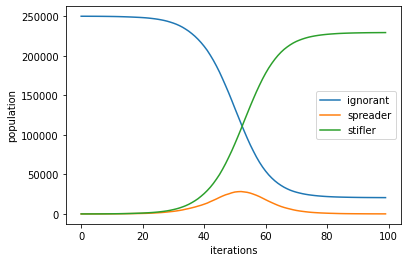

In [13]:
import pickle
import collections
import matplotlib.pyplot as plt

dset = pickle.load(open('./rumor_model_agent_based.pkl', 'rb'))

counts = [collections.Counter(idx.values()) for idx in dset]

ignorant = [c['ignorant'] for c in counts]
spreader = [c['spreader'] for c in counts]
stifler = [c['stifler'] for c in counts]

plt.plot([i for i in range(len(counts))], ignorant, label='ignorant')
plt.plot([i for i in range(len(counts))], spreader, label='spreader')
plt.plot([i for i in range(len(counts))], stifler, label='stifler')
plt.xlabel('iterations')
plt.ylabel('population')
plt.legend()


## Parallelism
### What is parallel processing?
#### When is it useful? When is it terrible?
### Python `multiprocessing`
### `dask`
### Packages with Built-In Parallelism


## Other Techniques for Big Data Problems
### Sparse Matrices & Friends
### GPU-Based Approaches